In [1]:
# parâmetros iniciais:
r0 = 2.5
Tinc = 5.2 # dias
Tinf = 2.9 # dias

2.9

In [2]:
# definindo a função: y'= F(y)
F(y)= [-(r0/Tinf)*y[1]*y[3];
        (r0/Tinf)*y[1]*y[3]- y[2]/Tinc; 
        y[2]/Tinc- y[3]/Tinf;
        y[3]/Tinf]

F (generic function with 1 method)

In [3]:
#definindo os vetores, o passo e o número de dias:
h = 1
n = 498 
S = zeros(n)
E = zeros(n)
I = zeros(n)
R = zeros(n)
tempo = [1:1:n;]

498-element Vector{Int64}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
 487
 488
 489
 490
 491
 492
 493
 494
 495
 496
 497
 498

In [4]:
#condições iniciais:
S[1], E[1], I[1], R[1] = 0.999999, 10^-6, 0, 0

(0.999999, 1.0000000000000004e-6, 0, 0)

In [5]:
#método iterativo do Ponto Médio:
for i = 2:n
    y05 = [S[i-1];E[i-1];I[i-1];R[i-1]] + (h/2)*F([S[i-1];E[i-1];I[i-1];R[i-1]])
    S[i], E[i], I[i], R[i] = [S[i-1];E[i-1];I[i-1];R[i-1]] + h*F(y05)  
end

In [6]:
using Plots

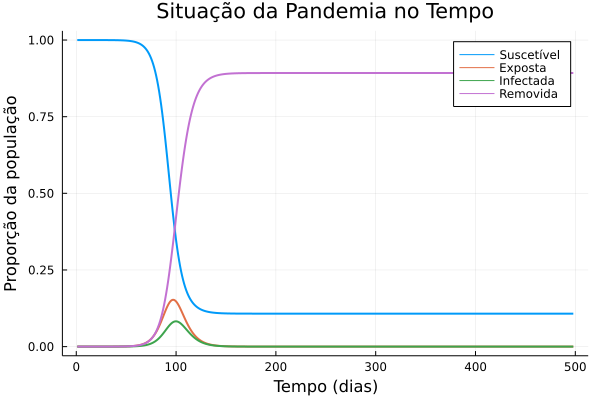

In [7]:
plot(tempo,S, label= "Suscetível", w=2,
     title = "Situação da Pandemia no Tempo",
     ylabel = "Proporção da população",
     xlabel = "Tempo (dias)")
plot!(tempo,E, label = "Exposta", w=2)
plot!(tempo,I, label = "Infectada", w=2)
plot!(tempo,R, label = "Removida", w=2)

In [8]:
function maiorvalor(B)
    x = B[1]
    n = length(B)
    t = 0
    for i in 2:n
        y = B[i]
        if y > x
            x = y
            t = i
        end
    end
    return(x,t)
end


maiorvalor (generic function with 1 method)

In [9]:
maxI, t = maiorvalor(I)

(0.0824717193641513, 100)

In [10]:
maxI*44.04e6

3.6320545207972233e6

In [11]:
I

498-element Vector{Float64}:
 0.0
 1.4066006937359725e-7
 2.40049236382616e-7
 3.2016254774479396e-7
 3.9364092082608744e-7
 4.6806157259542754e-7
 5.483121751083805e-7
 6.379125270811195e-7
 7.397594087506386e-7
 8.565567519060464e-7
 9.910758054354458e-7
 1.1463254095138772e-6
 1.325677037234128e-6
 ⋮
 1.617827749109126e-20
 1.4427300772259328e-20
 1.2865832452673221e-20
 1.1473362017830681e-20
 1.023159880842754e-20
 9.124231765190063e-21
 8.136715176550012e-21
 7.25607761487196e-21
 6.470751551533351e-21
 5.7704214127828226e-21
 5.145888080529386e-21
 4.5889480582258184e-21

In [12]:
maximum(I)

0.0824717193641513

In [13]:
tempo

498-element Vector{Int64}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
 487
 488
 489
 490
 491
 492
 493
 494
 495
 496
 497
 498

In [14]:
tempo[t]

100

In [15]:
x=0
for i in 0:6
    x = I[100-i]
    x += x
end

@show(x)

x = 0.14322411510238797


0.14322411510238797

In [16]:
x = 0;
for i in 0:6
     x += I[100 - i]
end
@show(x)

x = 0.5500005135665287


0.5500005135665287

Número de leitos disponíveis

In [17]:
const LEITOS_DISPONIVEIS_POR_HABITANTE = 27/100e3
const LEITOS_NECESSARIOS_POR_REMOVIDO = 0.03
const HABITANTES = 44.04e6

4.404e7

In [18]:
leitos = LEITOS_DISPONIVEIS_POR_HABITANTE * HABITANTES

11890.8

In [19]:
dR = zeros(n - 1)
for i in 1:n - 1
    dR[i] = R[i + 1] - R[i]
end

length(dR) = 497
length(tempo[1:497]) = 497


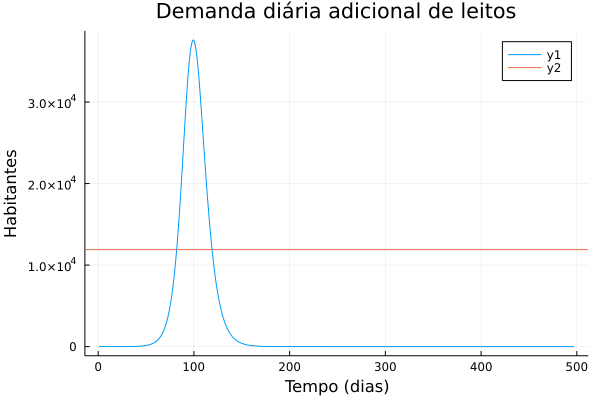

In [20]:
@show(length(dR))
@show(length(tempo[1:497]))

plot(tempo[1:497],
     title = "Demanda diária adicional de leitos",
     ylabel = "Habitantes",
     xlabel = "Tempo (dias)",
     dR*HABITANTES*0.03)
hline!([leitos])

In [21]:
demanda_diaria = dR * HABITANTES * LEITOS_NECESSARIOS_POR_REMOVIDO

497-element Vector{Float64}:
 0.043806366047745376
 0.09285728551371594
 0.13059501171132032
 0.16378630535346553
 0.19641738828337163
 0.23098535588609892
 0.2692152565989693
 0.3124621153331345
 0.36194073839022767
 0.4188620849400492
 0.4845197700274037
 0.5603509149846987
 0.6479849510134288
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [75]:
demanda_diaria[65 + 7] - leitos

-8648.762005266914

In [22]:
demanda_acumulada = []
for i in 1:length(dR) - 7
    x = 0
    for j in 0:6
        x += demanda_diaria[i+j]
    end
    push!(demanda_acumulada, x)
end

@show(length(demanda_acumulada))
demanda_acumulada

length(demanda_acumulada) = 490


490-element Vector{Any}:
 1.1276629693946871
 1.3963187186800763
 1.6654021715565879
 1.9536692447853166
 2.2744027094592547
 2.638336236160582
 3.0553358312879118
 3.535408761261485
 4.089355456533005
 4.729240052929108
 5.4687785950419245
 6.323702123330456
 7.31212928791342
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

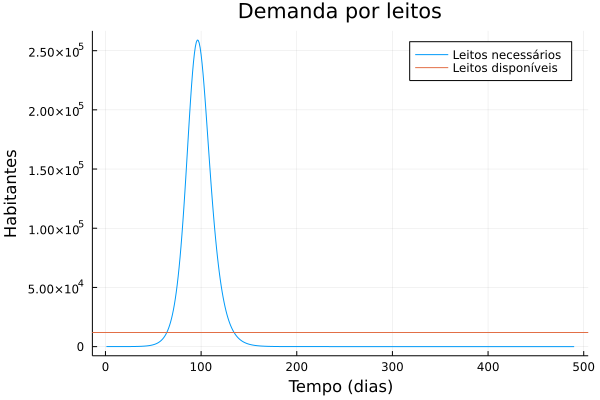

In [23]:
plot(tempo[1:(n-8)],
     demanda_acumulada,
     label = "Leitos necessários",
     title = "Demanda por leitos",
     ylabel = "Habitantes",
     xlabel = "Tempo (dias)")
hline!([leitos], label = "Leitos disponíveis")

In [24]:
@show(demanda_acumulada[60])
vector = demanda_acumulada .- leitos

demanda_acumulada[60] = 6629.183811212024


490-element Vector{Float64}:
 -11889.672337030604
 -11889.40368128132
 -11889.134597828443
 -11888.846330755214
 -11888.52559729054
 -11888.161663763838
 -11887.744664168711
 -11887.264591238738
 -11886.710644543466
 -11886.07075994707
 -11885.331221404957
 -11884.476297876668
 -11883.487870712086
      ⋮
 -11890.8
 -11890.8
 -11890.8
 -11890.8
 -11890.8
 -11890.8
 -11890.8
 -11890.8
 -11890.8
 -11890.8
 -11890.8
 -11890.8

In [25]:
demanda_acumulada[60]

6629.183811212024

In [86]:
excesso_demanda = 0
for i in 1:length(vector)
    if vector[i] > 0
        excesso_demanda += vector[i]
    end
end

@show(excesso_demanda/7)

excesso_demanda / 7 = 1.0327500251539262e6


1.0327500251539262e6

In [27]:
a, b = maiorvalor(dR)

(0.02845847875253743, 99)

In [28]:
sum(dR[50:150])*44e6*0.03

1.173885934741556e6

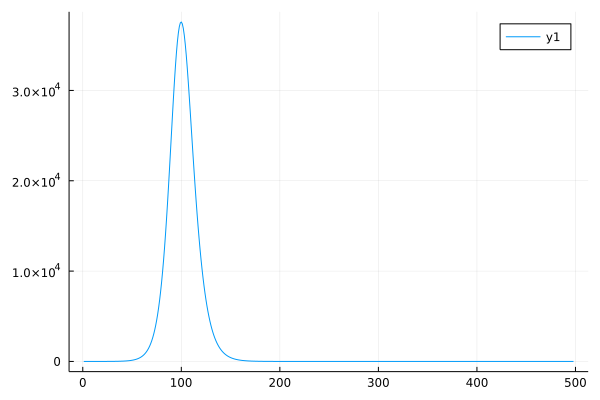

In [29]:
dR2 = I/Tinf
# @show(length(dR2))
plot(tempo, dR2*HABITANTES*0.03)

length(demanda_acumulada) = 491


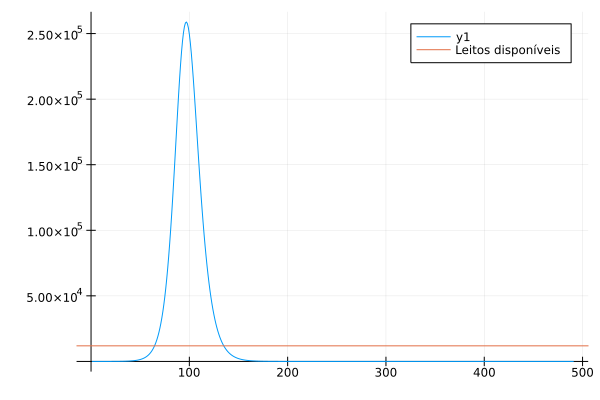

In [46]:
demanda_diaria2 = (dR2 * HABITANTES * 0.03)
demanda_acumulada = zeros(n - 7)

for i in 7:n - 1
    s = 0
    for j in 0:6
        s += demanda_diaria2[i - j]
    end
    demanda_acumulada[i - 6] = s
end

@show(length(demanda_acumulada))

plot([1:1:491;], demanda_acumulada)
hline!([leitos], label = "Leitos disponíveis", framestyle = :origin)

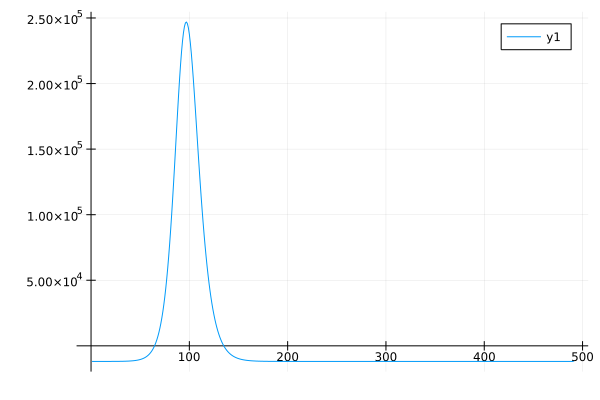

In [45]:
excesso_demanda = demanda_acumulada .- leitos
plot([1:1:491;], excesso_demanda, framestyle = :origin)

In [54]:
@show(excesso_demanda[64])
@show(excesso_demanda[65])

excesso_demanda[64] = -957.810224252511
excesso_demanda[65] = 700.8722898095348


700.8722898095348

In [65]:
@show(excesso_demanda[135])
@show(excesso_demanda[136])

excesso_demanda[135] = 2.789857644476797
excesso_demanda[136] = -1257.2602783557359


-1257.2602783557359

In [87]:
pessoas_sem_leito = sum(demanda_diaria[65 + 7: 135 + 7])

1.1495871719523785e6

In [88]:
pessoas_sem_leito/(HABITANTES*0.03)

0.8701083650865716